In [56]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv("../../Data/Dataset_v0.csv",sep=";")

###  Catégoriser les types de variables :
 - Categorique ;
 - Numérique ;
 - Distance ;
 - Date

In [58]:
def categorisation(data,date_cols):
    distance = []
    date = []
    numerique = []
    categorique = []
    for col in data.columns:
        if data[col].dtypes == np.object:
            try:
                if str(type(eval(data[col][data[col].first_valid_index()]))) == "<class 'list'>":
                    distance.append(col)
                elif col in date_cols:
                    date.append(col)
                else:
                    categorique.append(col)
            except:
                if col in date_cols:
                    date.append(col)
                else:
                    categorique.append(col)
                
            
        else :
            numerique.append(col)
                
    return dict({"numerique":numerique,"categorique":categorique,"date":date,"distance":distance})

In [59]:
feat_cat = categorisation(data,["Listing Date"])
feat_cat

{'numerique': ['price',
  'Listing Number',
  'Floor Size',
  'Bathrooms',
  'Reception Rooms',
  'Price per m²',
  'Erf Size',
  'Levies',
  'Rates and Taxes',
  'Bedrooms',
  'Kitchens',
  'Lounges',
  'Dining Rooms',
  'Gardens',
  'Coverage',
  'Office',
  'Domestic Rooms'],
 'categorique': ['name',
  'province',
  'city',
  'address',
  'Type of Property',
  'Street Address',
  'Bedroom',
  'Bathroom 1',
  'Bathroom 2',
  'Kitchen',
  'Other',
  'Parking',
  'Garden',
  'Pool',
  'Security',
  'No Transfer Duty',
  'Pets Allowed',
  'Lifestyle',
  'Bedroom 1',
  'Bedroom 2',
  'Bedroom 3',
  'Bedroom 4',
  'Bathroom 3',
  'Dining Room',
  'Garage',
  'Lounge',
  'Bathroom',
  'Special Features',
  'Nearby Public Transport',
  'Description',
  'Family/TV Room',
  'Garage 1',
  'Garage 2',
  'Temperature Control',
  'Style',
  'Facing',
  'Roof',
  'Wall',
  'Window',
  'Entrance Hall',
  'Rooms',
  'Special Feature',
  'Outbuilding',
  'Flatlet',
  'Standalone Building',
  'Interne

## 1) Traitement des valeurs manquantes

### traitement par colonne

In [60]:
missing = pd.DataFrame([data.isna().sum().values,(data.isna().sum()/data.shape[0]).values],index = ["valeurs manquantes","% valeurs manquantes"] , columns=data.columns)
missing

,name,price,province,city,address,Listing Number,Type of Property,Street Address,Listing Date,Floor Size,...,Special Feature,Outbuilding,Flatlet,Standalone Building,Office,Domestic Rooms,Internet Access,Wheelchair Accessible,Parking 1,Parking 2
valeurs manquantes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9814.00000,0.0,5897.000000,...,12581.000000,13074.000000,13021.000000,12646.000000,13136.000000,12836.000000,12916.000000,13198.000000,13251.000000,13251.000000
% valeurs manquantes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.70005,0.0,0.420643,...,0.897425,0.932591,0.928811,0.902061,0.937014,0.915615,0.921321,0.941437,0.945217,0.945217


In [61]:
missing.T.describe()

,valeurs manquantes,% valeurs manquantes
count,73.000000,73.000000
mean,9179.424658,0.654785
std,4509.739208,0.321688
min,0.000000,0.000000
25%,6741.000000,0.480847
50%,10945.000000,0.780726
75%,12746.000000,0.909195
max,13251.000000,0.945217


### On va supprimer certaines variables par seuil de valeurs manquantes mais sauver quelques variables pertinents au niveau métier et selon la correlation par rapport au prix :


In [62]:
def drop_columns(data,keep,drop,seuil):    
    missing = pd.DataFrame([data.isna().sum().values,(data.isna().sum()/data.shape[0]).values],index = ["valeurs manquantes","% valeurs manquantes"] , columns=data.columns)
    missing_freq = missing.T[missing.T["% valeurs manquantes"]>=seuil]
    print(len(missing_freq["% valeurs manquantes"]))
    (len(missing_freq["% valeurs manquantes"])/data.shape[1])*100

    for i in missing_freq.T.columns:
        ## variable à sauver
        if i not in keep:
            drop.append(i)
            
    return data.drop(drop,axis=1)

#### use mean of price to get ordinal categorical features

In [63]:
data_tmp = data.copy()

In [64]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'price']].groupby(feature).mean()['price']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in feat_cat["categorique"]:  
    encode(data_tmp, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['name_E', 'province_E', 'city_E', 'address_E', 'Type of Property_E', 'Street Address_E', 'Bedroom_E', 'Bathroom 1_E', 'Bathroom 2_E', 'Kitchen_E', 'Other_E', 'Parking_E', 'Garden_E', 'Pool_E', 'Security_E', 'No Transfer Duty_E', 'Pets Allowed_E', 'Lifestyle_E', 'Bedroom 1_E', 'Bedroom 2_E', 'Bedroom 3_E', 'Bedroom 4_E', 'Bathroom 3_E', 'Dining Room_E', 'Garage_E', 'Lounge_E', 'Bathroom_E', 'Special Features_E', 'Nearby Public Transport_E', 'Description_E', 'Family/TV Room_E', 'Garage 1_E', 'Garage 2_E', 'Temperature Control_E', 'Style_E', 'Facing_E', 'Roof_E', 'Wall_E', 'Window_E', 'Entrance Hall_E', 'Rooms_E', 'Special Feature_E', 'Outbuilding_E', 'Flatlet_E', 'Standalone Building_E', 'Internet Access_E', 'Wheelchair Accessible_E', 'Parking 1_E', 'Parking 2_E']


#### use spearman correlation to get which column to keep

In [65]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['price'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

/home/tokyaxel/.local/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


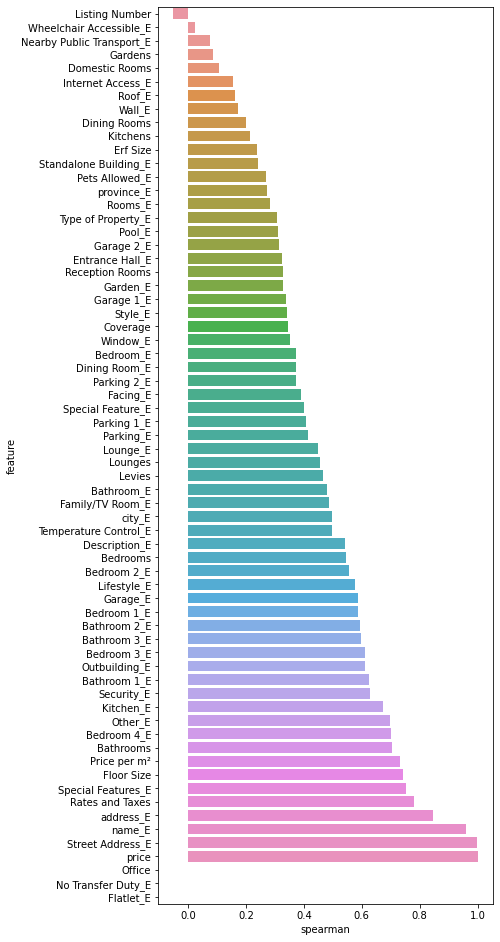

In [66]:
numeric = feat_cat["numerique"]

features = numeric + qual_encoded
spearman(data_tmp, features)

- On garde les variables dans "must_keep" même si le % de valeur manquante dépasse les 40%
- Malgrè la forte correlation de certaine variable catégorique, on les supprime quand même car leur taux de valeur manquante dépasse les 60% (voir [EDA_by_pandas_profiling](../Data_analysis/EDA_by_pandas_profiling.ipynb) ) 

In [67]:
must_keep = feat_cat["distance"]+['price','Bathrooms','Floor Size','Levies','Rates and Taxes','Bedrooms','Kitchens','Garage',"Gardens",'Pool','Pets Allowed','Security']
must_drop = ['Listing Number','Price per m²']+feat_cat["date"]

In [68]:
data = drop_columns(data,must_keep,must_drop,0.40)

59


In [69]:
data.shape

(14019, 23)

### 2) Traitement des valeurs aberrantes

### Détection par z-score (mbola tsy mety)

https://towardsdatascience.com/z-score-for-anomaly-detection-d98b0006f510

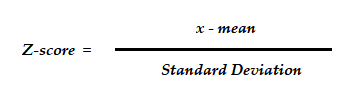


In [70]:
def z_score(data,columns,seuil):
    z_scores = stats.zscore(data[columns])
    print(z_scores)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < seuil).all(axis=1)
    data = data[filtered_entries]
    return data

### par IQR 

$$ IQR = Q3 - Q1 $$
$$ interval = [Q1 - seuil * IQR, Q3 + seuil * IQR]$$

In [71]:
def IQR(df,cols,quantiles=[0.25,0.75],seuil=1.5):
    Q1 = df[cols].quantile(quantiles[0])
    Q3 = df[cols].quantile(quantiles[1])
    IQR = Q3 - Q1

    return df[~((df[cols] < (Q1 - seuil * IQR)) |(df[cols] > (Q3 + seuil * IQR))).any(axis=1)]

Variables sur les prix (+ Listing Number) à ne pas vérifier : 
- 'price'

In [72]:
data.shape

(14019, 23)

In [73]:
feat_cat = categorisation(data,[""])
feat_cat

{'numerique': ['price',
  'Floor Size',
  'Bathrooms',
  'Levies',
  'Rates and Taxes',
  'Bedrooms',
  'Kitchens',
  'Gardens'],
 'categorique': ['name',
  'province',
  'city',
  'address',
  'Type of Property',
  'Pool',
  'Security',
  'Pets Allowed',
  'Garage'],
 'date': [],
 'distance': ['Health',
  'Food and Entertainment',
  'Shopping',
  'Sports and Leisure',
  'Education',
  'Transport and Public Services']}

In [74]:
to_check = [ 'Bathrooms',
  'Levies',
  'Rates and Taxes',
  'Bedrooms',
  'Kitchens',
  'Gardens']

#data = z_score(data,to_check,1.)
data = IQR(data,to_check,quantiles=[0.5,0.95])
data.shape

(13666, 23)

In [75]:
data.to_csv("../../Data/Dataset_v1.csv",sep=";",index=False)